<a href="https://colab.research.google.com/github/jvwk/Describing-distributions/blob/main/Describing_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Describing Distributions**

## *Jaco van Wyk*

------------------

Analyse and visualise the following features in the Medical Dataset:

- VitD_levels
- Doc_visits
- TotalCharge


For each feature:

- Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)
- Answer the following questions:
  - Is it Discrete or Continuous?
  - Does it have a skew? If so, which direction (+/-)
  - What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Get data

file = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(file)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
def describe_distr(col):

    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature, ax = ax, stat = 'probability', kde = True)
    ax.axvline(mean, color = 'red', label=f'mean = {mean:,.2f}')
    ax.axvline(median, color = 'green', label=f'median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

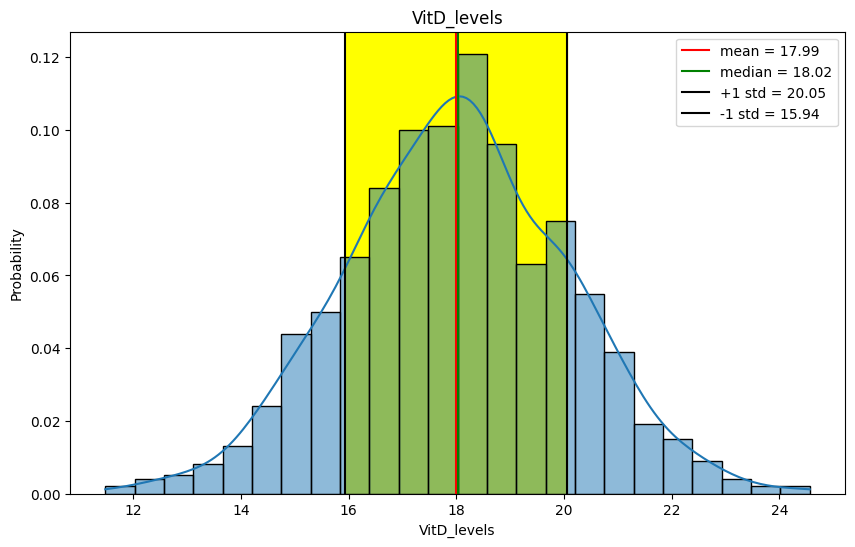

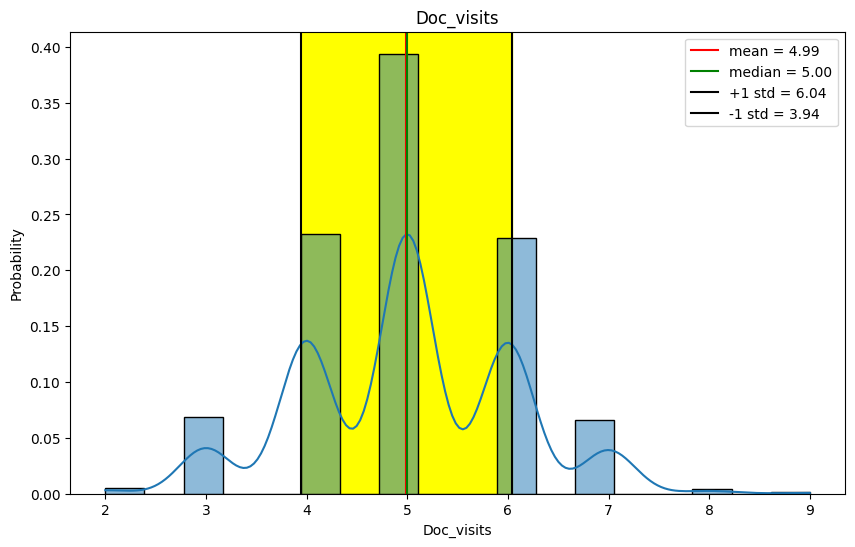

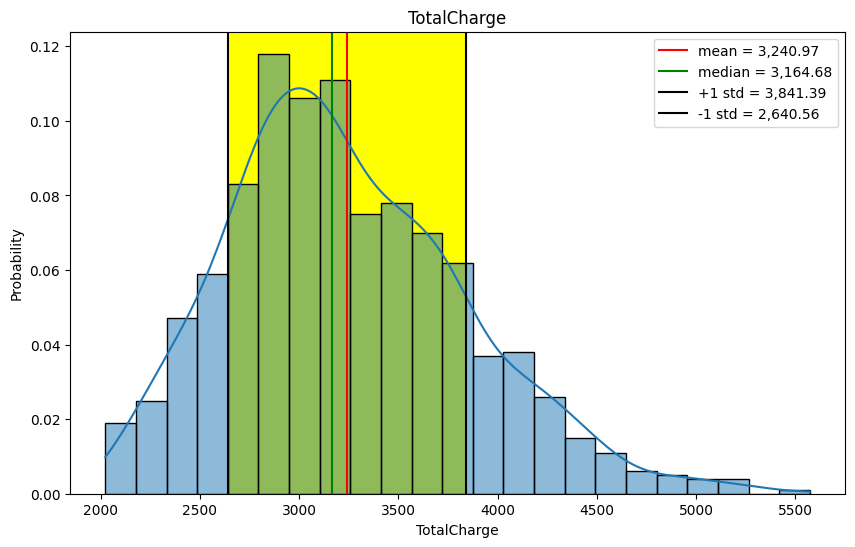

In [4]:
cols = ['VitD_levels', 'Doc_visits', 'TotalCharge']
for col in cols:
    describe_distr(col)

In [9]:
for col in cols:
  kurt = stats.kurtosis(df[col], fisher = False)
  print(f'Kurtosis of {col} is {kurt:.2f}')


Kurtosis of VitD_levels is 3.01
Kurtosis of Doc_visits is 2.99
Kurtosis of TotalCharge is 3.27


Question | VitD_levels | Doc_visits | TotalCharge
------- | ------- | ------- | -------
Is it Discrete or Continuous? | Continuous | Discrete | Continuous
Does it have a skew? If so, which direction (+/-) | Not skew | Not skew | Positively skew
What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) | Mesokurtic | Mesokurtic | Leptokurtic

